Custom Dimensional Weight Divisor : 257

The incentives stated above are valid from July 27, 2019 to June 29, 2024.

Instructions

https://billing.ups.com/home

    click on my invoices

    export data to table to create the helpful one

    download documents to create the detailed one


https://docs.google.com/document/d/1X_ptuq2UsNBSR3m1nW-qWsye34lB7soxKTAYMYcmDEM/edit?usp=sharing

https://www.ups.com/assets/resources/media/en_US/SurePost_Terms.pdf -- Surepost terms


In [1]:
# Imports
#import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime as dt
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 60)

In [2]:
# header list from UPS for full 250 column invoice CSV
header_list = ["Version","Recipient Number","Account Number","Account Country/Territory","Invoice Date","Invoice Number",
               "Invoice Type Code","Invoice Type Detail Code","Account Tax ID","Invoice Currency Code","Invoice Amount",
               "Transaction Date","Pickup Record Number","Lead Shipment Number","World Ease Number",
               "Shipment Reference Number 1","Shipment Reference Number 2","Bill Option Code","Package Quantity",
               "Oversize Quantity","Tracking Number","Package Reference Number 1","Package Reference Number 2",
               "Package Reference Number 3","Package Reference Number 4","Package Reference Number 5","Entered Weight",
               "Entered Weight Unit of Measure","Billed Weight","Billed Weight Unit of Measure","Container Type",
               "Billed Weight Type","Package Dimensions","Zone","Charge Category Code","Charge Category Detail Code",
               "Charge Source","Type Code 1","Type Detail Code 1","Type Detail Value 1","Type Code 2","Type Detail Code 2",
               "Type Detail Value 2","Charge Classification Code","Charge Description Code","Charge Description",
               "Charged Unit Quantity","Basis Currency Code","Basis Value","Tax Indicator","Transaction Currency Code",
               "Incentive Amount","Net Amount","Miscellaneous Currency Code","Miscellaneous Incentive Amount",
               "Miscellaneous Net Amount","Alternate Invoicing Currency Code","Alternate Invoice Amount",
               "Invoice Exchange Rate","Tax Variance Amount","Currency Variance Amount","Invoice Level Charge",
               "Invoice Due Date","Alternate Invoice Number","Store Number","Customer Reference Number","Sender Name",
               "Sender Company Name","Sender Address Line 1","Sender Address Line 2","Sender City","Sender State",
               "Sender Postal","Sender Country/Territory","Receiver Name","Receiver Company Name","Receiver Address Line 1",
               "Receiver Address Line 2","Receiver City","Receiver State","Receiver Postal","Receiver Country/Territory",
               "Third Party Name","Third Party Company Name","Third Party Address Line 1","Third Party Address Line 2",
               "Third Party City","Third Party State","Third Party Postal","Third party Country/Territory","Sold To Name",
               "Sold To Company Name","Sold To Address Line 1","Sold To Address Line 2","Sold To City","Sold To State",
               "Sold To Postal","Sold to Country/Territory","Miscellaneous Address Qual 1","Miscellaneous Address 1 Name",
               "Miscellaneous Address 1 Company Name","Miscellaneous Address 1 Address Line 1",
               "Miscellaneous Address 1 Address Line 2","Miscellaneous Address 1 City","Miscellaneous Address 1 State",
               "Miscellaneous Address 1 Postal","Miscellaneous address 1 Country/Territory","Miscellaneous Address Qual 2",
               "Miscellaneous Address 2 Name","Miscellaneous Address 2 Company Name","Miscellaneous Address 2 Address Line 1",
               "Miscellaneous Address 2 Address Line 2","Miscellaneous Address 2 City","Miscellaneous Address 2 State",
               "Miscellaneous Address 2 Postal","Miscellaneous address 2 Country/Territory","Shipment Date",
               "Shipment Export Date","Shipment Import Date","Entry Date","Direct Shipment Date","Shipment Delivery Date",
               "Shipment Release Date","Cycle Date","EFT Date","Validation Date","Entry Port","Entry Number","Export Place",
               "Shipment Value Amount","Shipment Description","Entered Currency Code","Customs Number","Exchange Rate",
               "Master Air Waybill Number","EPU","Entry Type","CPC Code","Line Item Number","Goods Description","Entered Value",
               "Duty Amount","Weight","Unit of Measure","Item Quantity","Item Quantity Unit of Measure","Import Tax ID",
               "Declaration Number","Carrier Name/Clinical Trial Identification Number/SDS ID ","CCCD Number","Cycle Number",
               "Foreign Trade Reference Number","Job Number","Transport Mode","Tax Type","Tariff Code","Tariff Rate",
               "Tariff Treatment Number","Contact Name","Class Number","Document Type","Office Number","Document Number",
               "Duty Value","Total Value for Duty","Excise Tax Amount","Excise Tax Rate","GST Amount","GST Rate",
               "Order In Council","Origin Country/Territory","SIMA Access","Tax Value","Total Customs Amount",
               "Miscellaneous Line 1","Miscellaneous Line 2","Miscellaneous Line 3","Miscellaneous Line 4",
               "Miscellaneous Line 5","Payor Role Code","Miscellaneous Line 7","Miscellaneous Line 8","Miscellaneous Line 9",
               "Miscellaneous Line 10","Miscellaneous Line 11","Duty Rate","VAT Basis Amount","VAT Amount","VAT Rate",
               "Other Basis Amount","Other Amount","Other Rate","Other Customs Number Indicator","Other Customs Number",
               "Customs Office Name","Package Dimension Unit Of Measure","Original Shipment Package Quantity","Corrected Zone",
               "Tax Law Article Number","Tax Law Article Basis Amount","Original tracking number","Scale weight quantity",
               "Scale Weight Unit of Measure","Raw dimension unit of measure","Raw dimension length","BOL # 1","BOL # 2",
               "BOL # 3","BOL # 4","BOL # 5","PO # 1","PO # 2","PO # 3","PO # 4","PO # 5","PO # 6","PO # 7","PO # 8",
               "PO # 9","PO # 10","NMFC","Detail Class","Freight Sequence Number","Declared Freight Class","EORI Number",
               "Detail Keyed Dim","Detail Keyed Unit of Measure","Detail Keyed Billed Dimension","Detail Keyed Billed Unit of Measure",
               "Original Service Description","Promo Discount Applied Indicator","Promo Discount Alias","SDS Match Level Cd",
               "SDS RDR Date","SDS Delivery Date","SDS Error Code","Place Holder 46","Place Holder 47","Place Holder 48",
               "SCC Scale Weight","Place Holder 50","Place Holder 51","Place Holder 52","Place Holder 53","Place Holder 54",
               "Place Holder 55","Place Holder 56","Place Holder 57","Place Holder 58","Place Holder 59"]

In [3]:
# remove spaces from column name list 
header_list = [x.replace(' ', '_') for x in header_list]

# lowercase 
header_list = [x.lower() for x in header_list]

In [4]:
# All full invoice files 
extension = 'csv'
all_filenames = [i for i in glob.glob('Invoice_*.{}'.format(extension))]

In [5]:
list_of_dfs = []
for file in all_filenames:
    df = pd.read_csv(file, names=header_list, encoding='windows-1252')
    df['detail_keyed_dim'] = df['detail_keyed_dim'].bfill()
    list_of_dfs.append(df)

df_master = pd.concat(list_of_dfs, ignore_index=True) 

In [6]:
print(df_master.shape)
df_master.head()
df = df_master

(73803, 250)


In [7]:
# drop static and null columns 
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)

# drop personally identifiable info
df.drop(['receiver_company_name', 'receiver_address_line_1', 'receiver_address_line_2'], axis=1, inplace=True)

# add fuel surcharge as a feature 
df['fuel_cost'] = df.loc[df['charge_description'] == 'Fuel Surcharge']['net_amount']


df_detailed = df

In [8]:
df_detailed.head(2)
print(df_detailed.shape)

(73803, 63)


In [9]:
# merge in invoice summary to catch occational missing adjustment 
all_filenames = [i for i in glob.glob('000000R4R346*.{}'.format(extension))]

list_of_dfs_1 = []
for file in all_filenames:
    df = pd.read_csv(file)
    list_of_dfs_1.append(df)

df_condenced = pd.concat(list_of_dfs_1, ignore_index=True) 
df_condenced = df_condenced[df_condenced.columns.drop(["Ref No 2", 'Type', 'System'])]
df_condenced.columns = df_condenced.columns.str.replace(' ', '_')
df_condenced.columns = df_condenced.columns.str.lower()
df_condenced.head(2)

,tracking_number,transaction_date,service_code,published_charge,incentive_charge,net_charge,ref_no_1
0,1ZR4R346YW90072441,"Dec 21, 2021",UPS SurePost - 1 LB or Greater,$19.38,-$3.87,$15.51,3134770
1,1ZR4R346YW90135892,"Dec 28, 2021",UPS SurePost - 1 LB or Greater,$20.62,-$3.37,$17.25,3135116


In [10]:
# https://pbpython.com/pandas_dtypes.html
def convert_currency(val):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """
    new_val = val.replace(',','').replace('$', '')
    return float(new_val)

df_condenced['net_charge'] = df_condenced['net_charge'].apply(convert_currency)

In [11]:
# data consolidation -- extra column removal 
inspect = df_detailed[['billed_weight', 'package_quantity', 'zone','receiver_city',
                                          'receiver_state', 'receiver_postal', 'tracking_number', 'fuel_cost']].groupby(by='tracking_number', dropna=True).max()

# merge cleaner columns with summary invoice data 
df_clean = pd.merge(df_condenced,inspect[['billed_weight', 'package_quantity', 'zone','receiver_city',
                                          'receiver_state', 'receiver_postal', 'fuel_cost']], on ='tracking_number', how='inner')

In [12]:
# Merge detail keyed dim
df_clean = pd.merge(df_clean,df_detailed[['tracking_number', 'detail_keyed_dim']], 
                                    on ='tracking_number', how='inner')

# drop duplicates 
df_clean.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [13]:
# clean data 
df_clean['published_charge'] = df_clean['published_charge'].apply(convert_currency)
df_clean['incentive_charge'] = df_clean['incentive_charge'].apply(convert_currency)
df_clean['transaction_date'] = pd.to_datetime(df_clean['transaction_date'])
df_clean['receiver_postal'] = df_clean['receiver_postal'].astype(int).astype(str).str.zfill(5)
df_clean['ref_no_1'] = df_clean['ref_no_1'].astype(str)
df_clean['ref_no_1'] = df_clean['ref_no_1'].str[:7]

# drop international shipment
df_clean = df_clean[df_clean['service_code'] != 'Worldwide Saver']

df_clean.head(2)

,tracking_number,transaction_date,service_code,published_charge,incentive_charge,net_charge,ref_no_1,billed_weight,package_quantity,zone,receiver_city,receiver_state,receiver_postal,fuel_cost,detail_keyed_dim
0,1ZR4R346YW90072441,2021-12-21,UPS SurePost - 1 LB or Greater,19.38,-3.87,15.51,3134770,9.0,1,7.0,Halethorpe,MD,21227,1.54,15.0x 15.0x 10.0
1,1ZR4R346YW90135892,2021-12-28,UPS SurePost - 1 LB or Greater,20.62,-3.37,17.25,3135116,5.0,1,5.0,Woodstock,IL,60098,1.71,14.0x 14.0x 6.0


In [14]:
# drop international shipment
df_clean = df_clean[df_clean['service_code'] != 'Worldwide Saver']

df_clean.head(2)

,tracking_number,transaction_date,service_code,published_charge,incentive_charge,net_charge,ref_no_1,billed_weight,package_quantity,zone,receiver_city,receiver_state,receiver_postal,fuel_cost,detail_keyed_dim
0,1ZR4R346YW90072441,2021-12-21,UPS SurePost - 1 LB or Greater,19.38,-3.87,15.51,3134770,9.0,1,7.0,Halethorpe,MD,21227,1.54,15.0x 15.0x 10.0
1,1ZR4R346YW90135892,2021-12-28,UPS SurePost - 1 LB or Greater,20.62,-3.37,17.25,3135116,5.0,1,5.0,Woodstock,IL,60098,1.71,14.0x 14.0x 6.0


In [15]:
# Total Cost Per Shipment w/ adjustments and fuel surcharge
df_tot_cost = pd.DataFrame()
df_tot_cost['total_cost'] = df_detailed[['tracking_number', 'net_amount']].groupby(by = 'tracking_number').sum()
df_tot_cost.rename_axis("tracking_number")


# Merge adjustments onto dataframe
df_clean = pd.merge(df_clean,df_tot_cost['total_cost'], on ='tracking_number', how='inner')
df_clean['adjustment'] = round((df_clean['total_cost'] - df_clean['net_charge']), 2)

In [16]:
########### DISTANCE DATA ################

# read in existing distance data 
dist = pd.read_csv('dist.csv')
dist['receiver_postal'] = dist['receiver_postal'].astype(int).astype(str).str.zfill(5)
auxiliaryList = dist['receiver_postal'].tolist()

# append new zip codes 
zip_codes = df_clean['receiver_postal'].unique()
zip_codes


for code in zip_codes:
    if code not in auxiliaryList:
        auxiliaryList.append(code)

# merge on existing data 
dist_master = pd.DataFrame (auxiliaryList, columns = ['receiver_postal'])
dist_master = dist_master.merge(dist, on='receiver_postal', how='left')

dist_missing = dist_master[dist_master['distance_mi'].isnull()]
dist_missing.reset_index(inplace=True)

# Calculate distance for missing zipcodes 

import pgeocode
dist = pgeocode.GeoDistance('US')

miles = []
i = 1
for i in range(len(dist_missing)):
    dist = pgeocode.GeoDistance('US')
    zip_code = dist_missing.loc[i, 'receiver_postal']
    mi = dist.query_postal_code("80231", zip_code)
    miles.append(round(mi, 2))
    
dist_missing['distance_mi'] = miles

# drop na 
dist_master.dropna(subset=['distance_mi'], inplace=True)
# concat 
dist_master = pd.concat([dist_master, dist_missing], ignore_index=True)

#clean
dist_master.dropna(subset=['distance_mi'], inplace=True)
dist_master = dist_master[['receiver_postal', 'distance_mi']]

# export for future input 
dist_master.to_csv('dist.csv', header=True, index=False)

# need to merge onto dfclean
df_clean = pd.merge(df_clean, dist_master, how='outer')

C:\Users\evan\AppData\Local\Temp\ipykernel_7348\69042784.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_missing['distance_mi'] = miles


In [17]:
# create copy, drop dups, and sort 
df = df_clean.copy()
df.drop_duplicates(subset=['tracking_number'], keep='first', inplace=True)
df = df.sort_values(by=['transaction_date'], ascending=False)

In [18]:
# feature creation week of year 
# https://stackabuse.com/how-to-format-dates-in-python/

df['week_of_year'] = df['transaction_date'].dt.strftime('%W')
df['month'] = df['transaction_date'].dt.strftime('%m')

In [19]:
# output to CSV
df.to_csv("output.csv", header=True, index=False)
df.to_csv("distance_data.csv", header=True, index=False)

#create copy of df 
df_clean = df

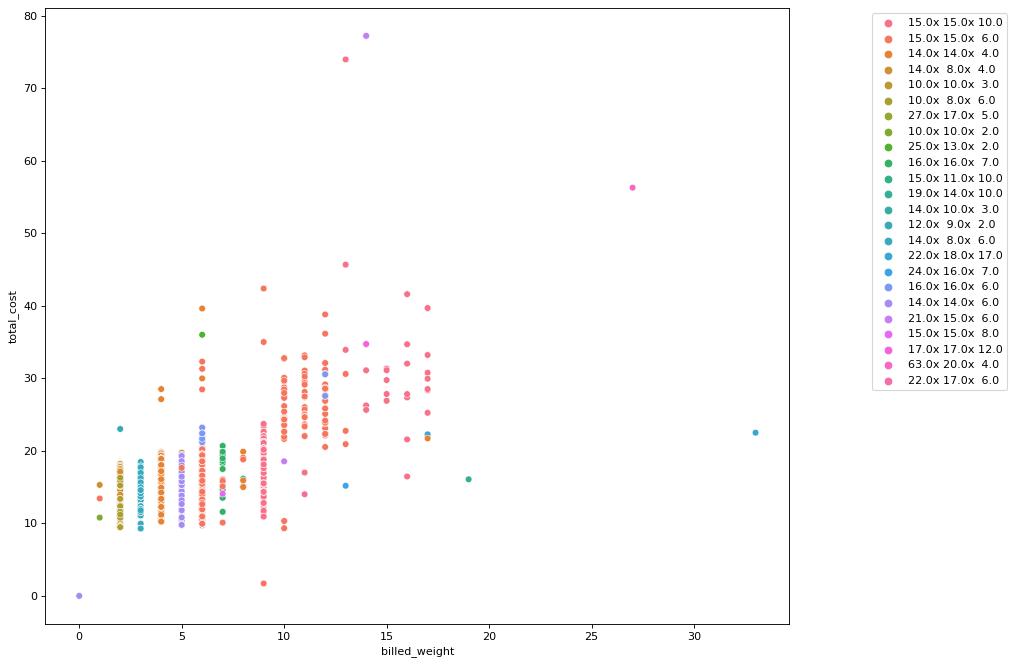

In [20]:
# Full Year Scatter Plot

figure(figsize=(12, 10), dpi=80);

sns.scatterplot(x='billed_weight',
               y = 'total_cost',
               hue = 'detail_keyed_dim',
               data = df_clean);

plt.legend(loc='best', bbox_to_anchor=(.7, 0., .6, 1));

In [21]:
# view adjustments 

df_adj = df_clean[df_clean['adjustment'] != 0]
df_adju = df_adj.drop_duplicates(keep='first')
df_adj = df_adj.sort_values(by=['transaction_date'], ascending=False)

## Analysis

In [22]:
# Adjustment Rate By Month
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
error_rate = []
df = df_clean.copy()

for month in months:
    df = df_clean.copy()
    df = df[df['transaction_date'].dt.strftime('%m') == month]
    df_error = df[df['adjustment'] != 0]
    df_expected = df[df['adjustment'] == 0]
    error_rate1 = (df_error.shape[0] / (df_expected.shape[0]+.01))*100
    error_rate.append(error_rate1)

zipped = list(zip(months, error_rate))
df_error_rate = pd.DataFrame(zipped, columns = ['month', 'error_rate'])
df_error_rate

,month,error_rate
0,01,3.885025
1,02,0.839891
2,03,0.761900
3,04,0.819220
4,05,0.859214
5,06,0.976134
6,07,0.561222
7,08,0.531441
8,09,0.396598
9,10,0.115339


## Filters (Date, Outliers, Error Shipments)

In [23]:
# Filter by Date 
df = df_clean.copy()

# Year
df = df[df['transaction_date'].dt.strftime('%Y') == '2022']

# Month
#df = df[df['transaction_date'].dt.strftime('%m') >= '07']

# outliers 
df = df[df['total_cost'] <= 60]

# adjustments

df = df[df['adjustment'] <= 0]

### Normal Shipments

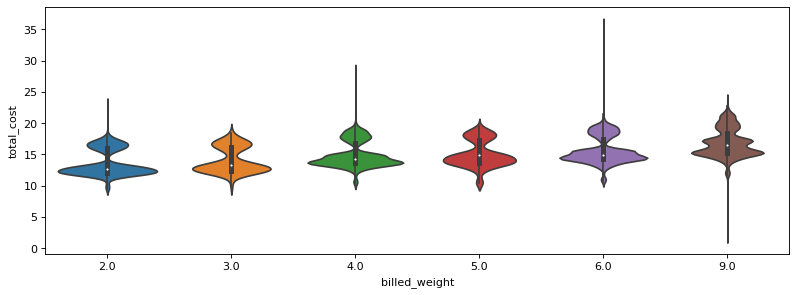

In [24]:
# Normal UPS Shipments
normal_billing_weight = [2.0, 3.0, 4.0, 5.0, 6.0, 9.0]

df_common = df[df['billed_weight'].isin(normal_billing_weight)]
figure(figsize=(12, 4), dpi=80);
ax = sns.violinplot(x="billed_weight", y="total_cost", data = df_common)

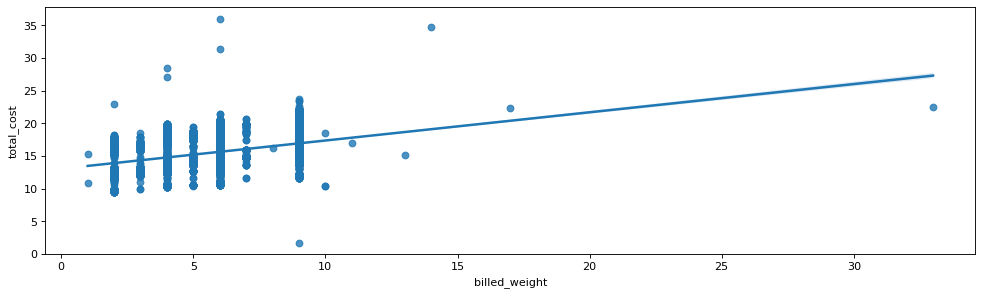

In [25]:
# Reg Plot with Date Filtered Data
figure(figsize=(15, 4), dpi=80);
ax = sns.regplot(x="billed_weight", y="total_cost", data=df)

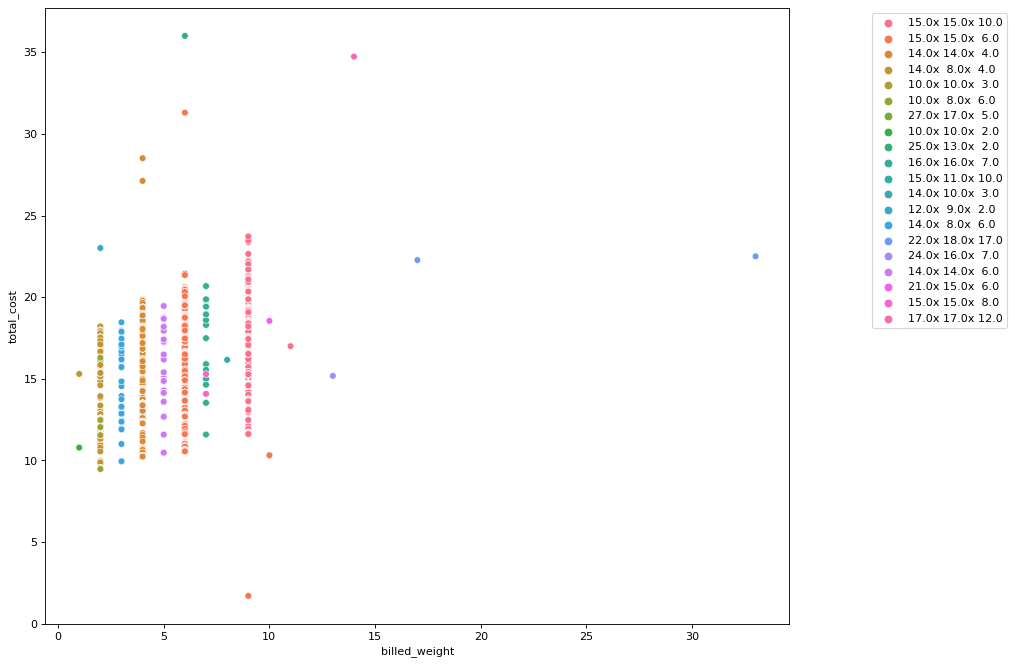

In [26]:
# Additional Filter
#df = df[df['Total Cost'] <= 40]

# Scatter Plot
figure(figsize=(12, 10), dpi=80);

sns.scatterplot(x='billed_weight',
               y = 'total_cost',
               hue = 'detail_keyed_dim',
               data = df);

plt.legend(loc='best', bbox_to_anchor=(.7, 0., .6, 1));

### Normal Box Size Shipments Averages (Filters Defined Above)

In [27]:
# Average Costs of Normal Shipments 
df_common.groupby(by=['billed_weight']).mean()

,published_charge,incentive_charge,net_charge,package_quantity,zone,fuel_cost,total_cost,adjustment,distance_mi
billed_weight,,,,,,,,,
2.0,16.696561,-3.083928,13.612632,1.0,5.687891,1.872706,13.612632,0.0,1786.251852
3.0,17.212564,-3.144359,14.068205,1.0,5.502564,1.519897,14.068205,0.0,1675.132513
4.0,18.382707,-3.447860,14.934847,1.0,5.691059,2.025600,14.934847,0.0,1794.486519
5.0,18.482170,-3.459872,15.022298,1.0,5.551064,1.602340,15.022298,0.0,1722.216702
6.0,19.279789,-3.613724,15.666065,1.0,5.667310,2.137358,15.666065,0.0,1775.354019
9.0,20.752872,-3.922260,16.830611,1.0,5.654050,2.287236,16.830611,0.0,1764.556685


### Error Shipments (Filters Defined Above)

In [28]:
df_error = df[~df['billed_weight'].isin(normal_billing_weight)]
df_error = df_error.drop_duplicates(subset=['tracking_number'])
df_error.groupby(by=['billed_weight']).mean()

,published_charge,incentive_charge,net_charge,package_quantity,zone,fuel_cost,total_cost,adjustment,distance_mi
billed_weight,,,,,,,,,
1.0,16.375000,-3.330000,13.045000,1.0,5.500000,1.915000,13.045000,0.0,1445.035000
7.0,19.893972,-3.756312,16.137660,1.0,5.794326,2.276879,16.137660,0.0,1841.389645
8.0,24.860000,-8.700000,16.160000,1.0,6.000000,2.440000,16.160000,0.0,1874.510000
10.0,15.170000,-2.106667,13.063333,1.0,6.000000,1.990000,13.063333,0.0,1625.843333
11.0,28.110000,-11.110000,17.000000,1.0,7.000000,1.790000,17.000000,0.0,2830.820000
13.0,23.710000,-8.530000,15.180000,1.0,4.000000,2.180000,15.180000,0.0,2614.270000
14.0,36.560000,-1.830000,34.730000,1.0,7.000000,3.720000,34.730000,0.0,2828.940000
17.0,33.030000,-10.760000,22.270000,1.0,5.000000,3.200000,22.270000,0.0,1658.070000
33.0,40.760000,-18.260000,22.500000,1.0,5.000000,3.230000,22.500000,0.0,1592.480000


### Adjustments (Filters Defined Above) -- All Box Sizes

In [29]:
df_adj = df[df['adjustment'] != 0]
df_adj = df_adj.drop_duplicates(subset=['tracking_number'])
df_adj.sort_values(by=['transaction_date'], ascending=False)

,tracking_number,transaction_date,service_code,published_charge,incentive_charge,net_charge,ref_no_1,billed_weight,package_quantity,zone,receiver_city,receiver_state,receiver_postal,fuel_cost,detail_keyed_dim,total_cost,adjustment,distance_mi,week_of_year,month


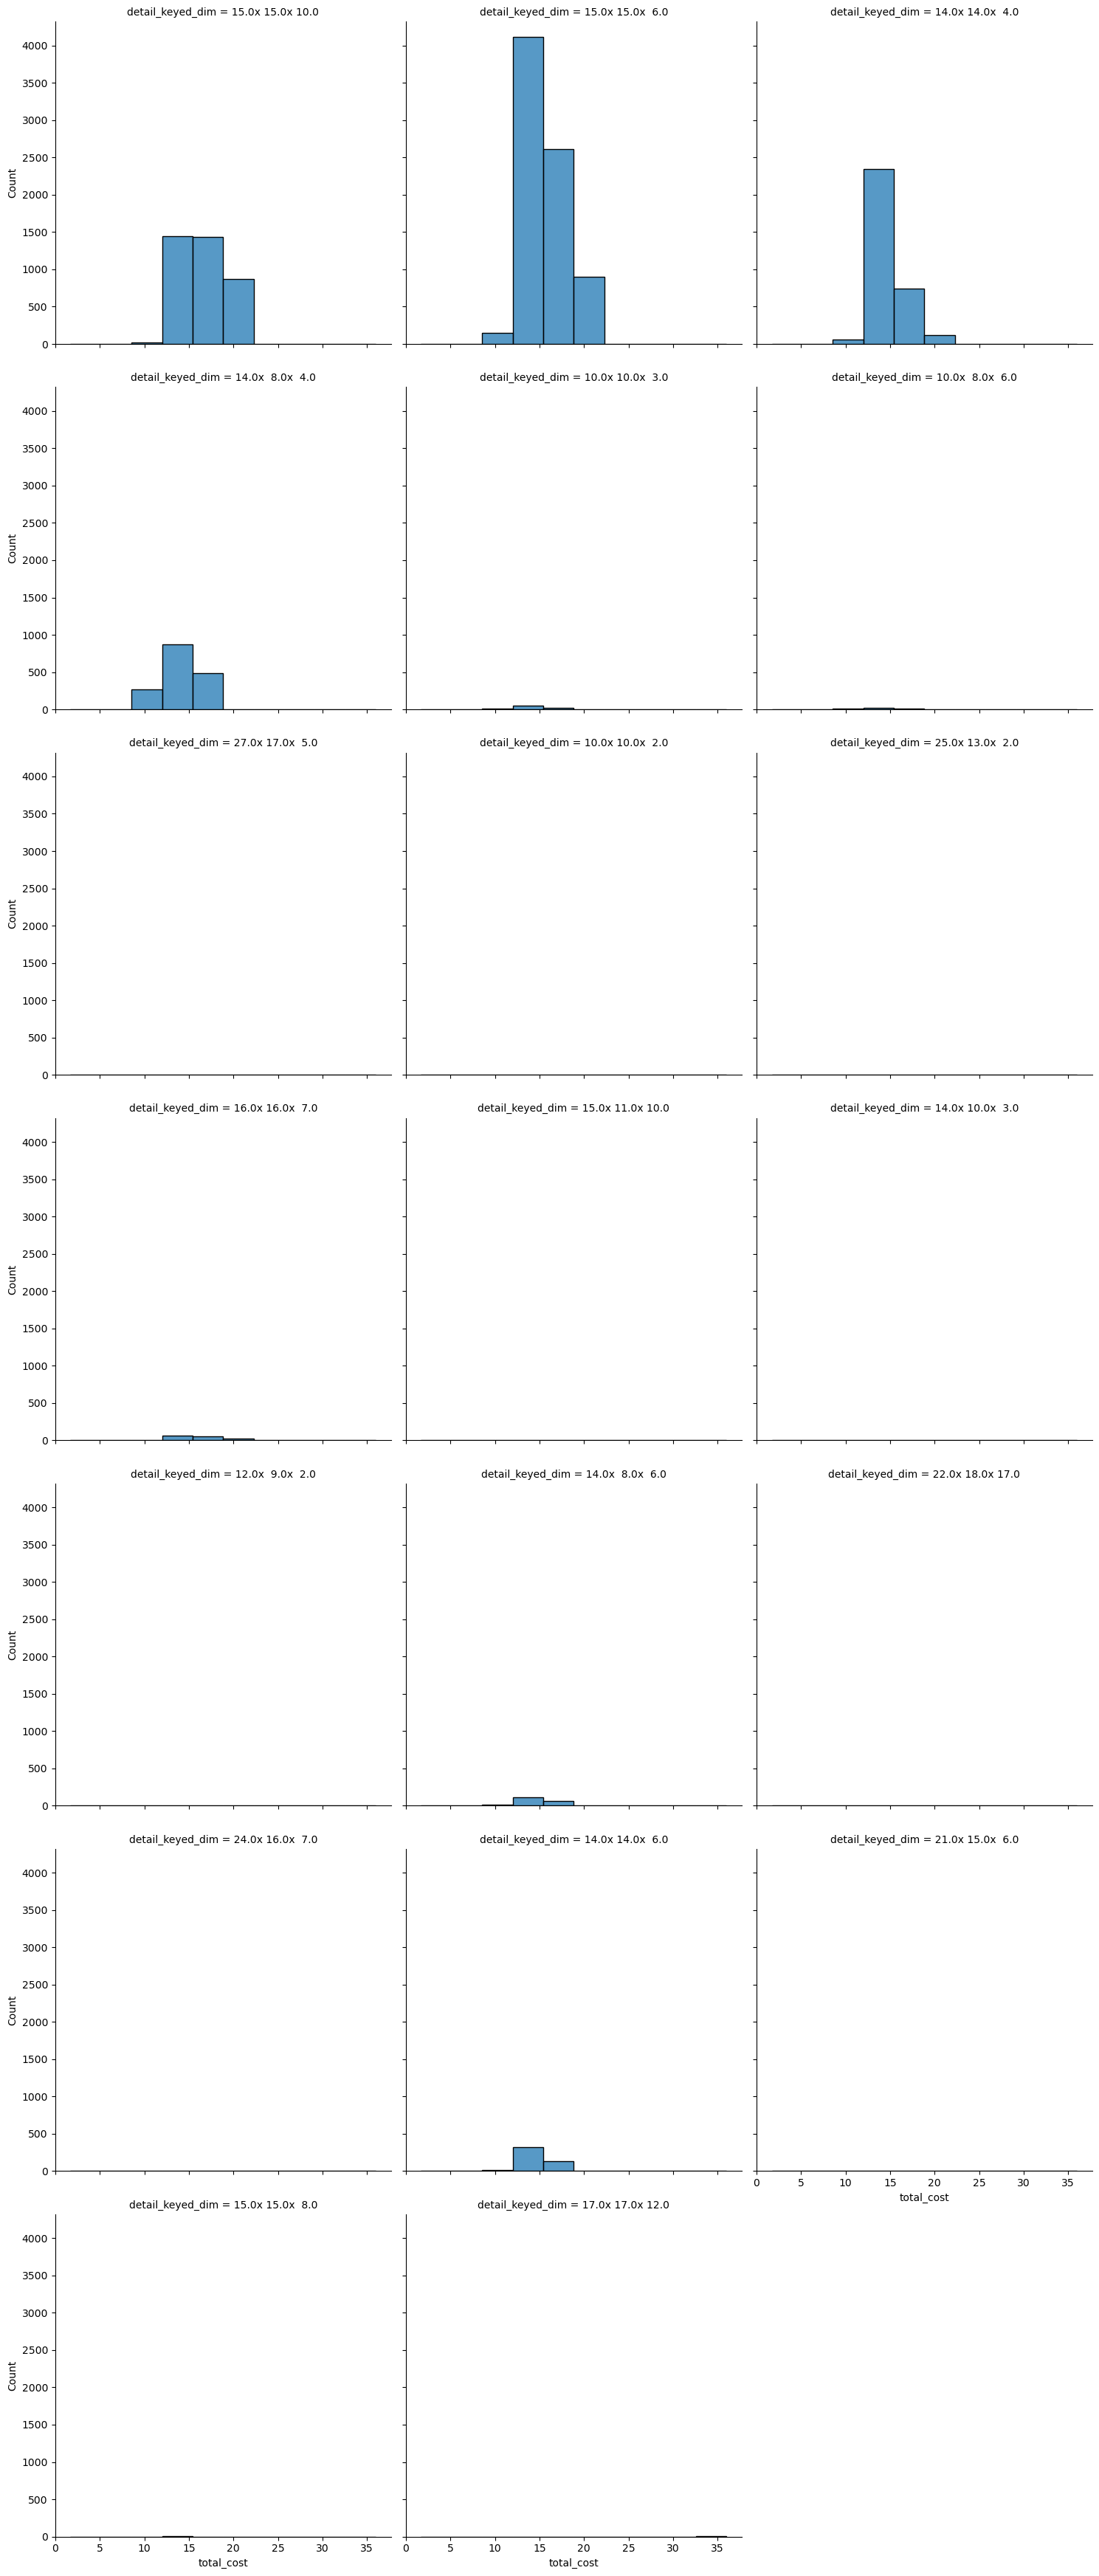

In [30]:
import seaborn as sns

sns.displot(data=df,
           col='detail_keyed_dim',
           x = 'total_cost',
           col_wrap = 3,
           bins=10);

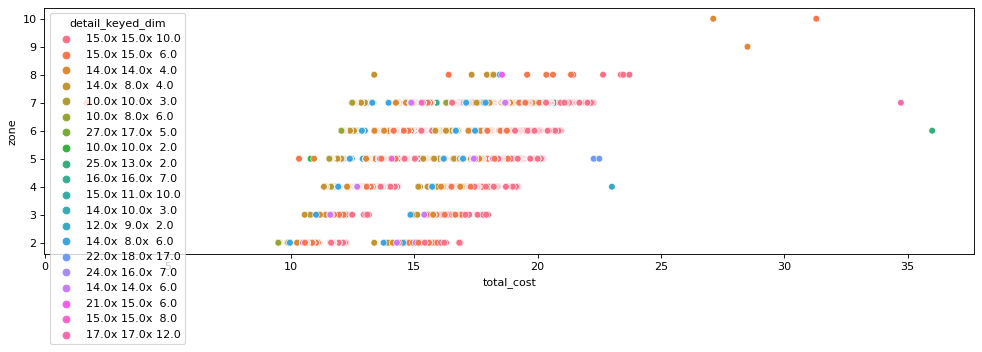

In [31]:
# plot zone
figure(figsize=(15, 4), dpi=80);
sns.scatterplot(data=df,
           hue='detail_keyed_dim',
           x = 'total_cost',
           y = 'zone'
               );

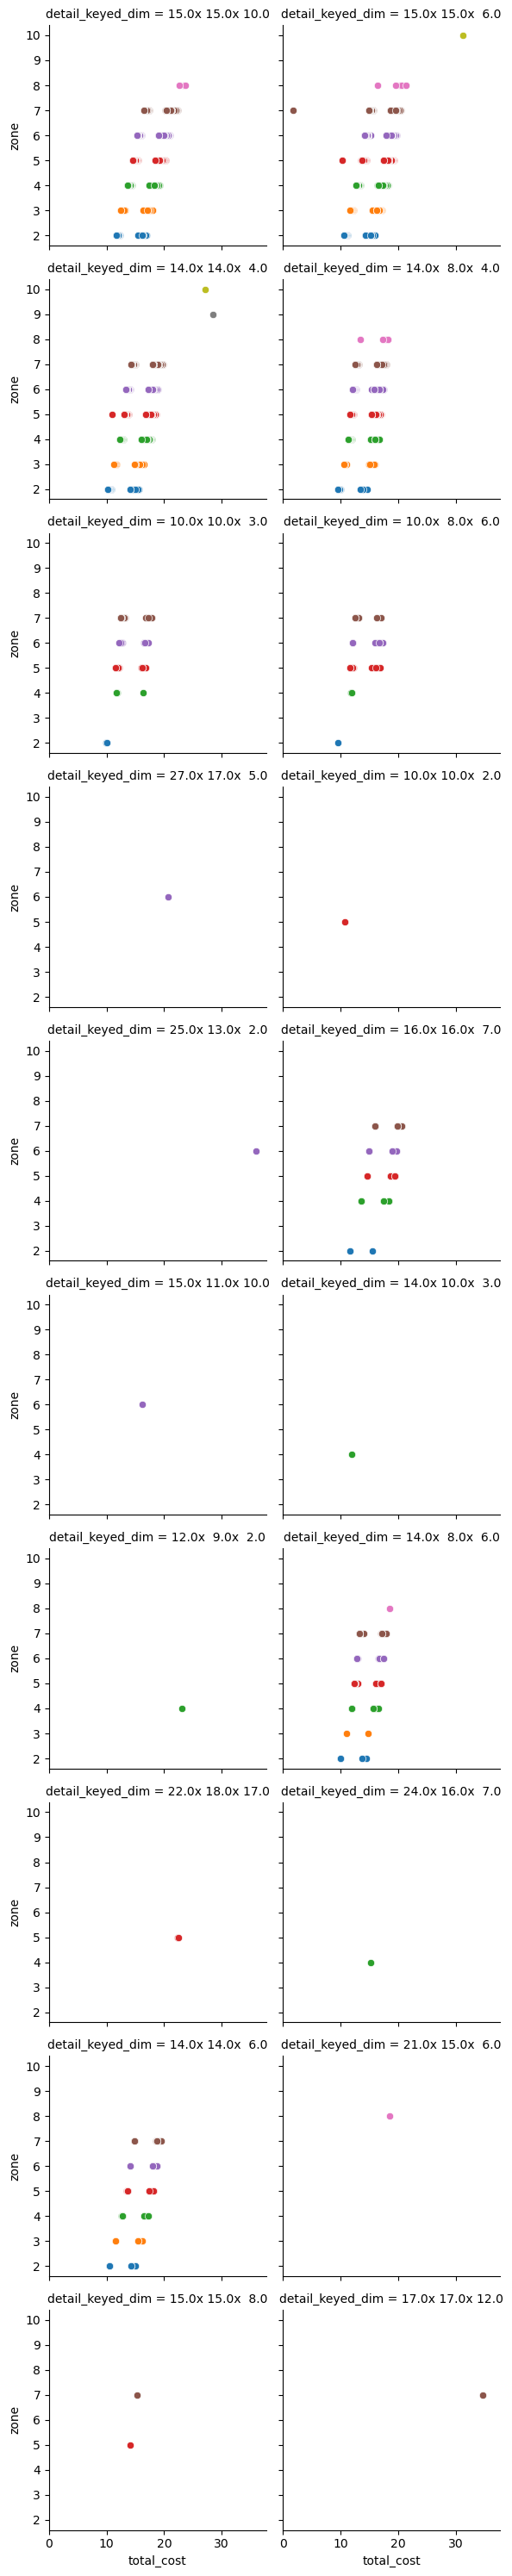

In [32]:
# 
grid = sns.FacetGrid(data=df,
                    col='detail_keyed_dim',
                    hue='zone',
                    col_wrap=2);

grid.map(sns.scatterplot,"total_cost", "zone");

In [33]:
from statsmodels.formula.api import ols

mdl = ols('total_cost ~ billed_weight + fuel_cost + distance_mi + month', data=df).fit()

mdl.params

Intercept        3.674069e+00
month[T.02]     -3.421606e-01
month[T.03]     -1.280792e+00
month[T.04]     -3.497362e+00
month[T.05]     -4.336579e+00
month[T.06]     -4.793559e+00
month[T.07]     -4.697902e+00
month[T.08]     -3.703491e+00
month[T.09]     -3.733036e+00
month[T.10]     -1.457952e-15
billed_weight    2.670986e-02
fuel_cost        6.929329e+00
distance_mi      6.596880e-05
dtype: float64

In [34]:
print("R squared:", mdl.rsquared)
print("rse:" , np.sqrt(mdl.mse_resid))

R squared: 0.9529645653414739
rse: 0.497586352376373


In [35]:
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_cost   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 3.041e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:14:04   Log-Likelihood:                -11905.
No. Observations:               16521   AIC:                         2.383e+04
Df Residuals:                   16509   BIC:                         2.393e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.6741      0.024    155.137      0.000       3.628       3.720
month[T.02]      -0.3422      0.016    -21.099      0.000      -0.374      -0.310
month[T.03]      -1.2808      0.017    -74.112      0.000      -1.315      -1.247
month[T.04]      -3.4974      0.018   -191.304      0.000      -3.533      -3.462
month[T.05]      -4.3366      0.020   -217.294      0.000      -4.376      -4.297
month[T.06]      -4.7936      0.020   -241.373      0.000      -4.832      -4.755
month[T.07]      -4.6979      0.019   -243.078      0.000      -4.736      -4.660
month[T.08]      -3.7035      0.018   -209.038      0.000      -3.738      -3.669
month[T.09]      -3.7330      0.019   -200.413      0.000      -3.770      -3.697
month[T.10]   -1.458e-15   7.29e-18   -200.089      0.000   -1.47e-15   -1.44e-15
billed_weight     0.0267      0.002     13.230      0.000       0.023       0.031
fuel_cost         6.9293      0.014    488.623      0.000       6.902       6.957
distance_mi    6.597e-05   6.11e-06     10.802      0.000     5.4e-05    7.79e-05
==============================================================================
Omnibus:                    23953.619   Durbin-Watson:                   0.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         99376242.442
Skew:                           7.770   Prob(JB):                         0.00
Kurtosis:                     382.634   Cond. No.                     1.02e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.78e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### To Do 

distance_mi and zone have high VIF so one needs to be chosen

In [36]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# find design matrix for linear regression model 
y, X = dmatrices('total_cost ~ billed_weight + fuel_cost  + zone + month', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
print(vif, "\n")
print("VIF scores over 10 should be dropped.")

          VIF       variable
0   48.777771      Intercept
1    1.801364    month[T.02]
2    1.724320    month[T.03]
3    2.194714    month[T.04]
4    2.198974    month[T.05]
5    2.598227    month[T.06]
6    2.596710    month[T.07]
7    2.471830    month[T.08]
8    2.202476    month[T.09]
9    1.594884    month[T.10]
10   1.221268  billed_weight
11   2.498202      fuel_cost
12   1.155080           zone 

VIF scores over 10 should be dropped.


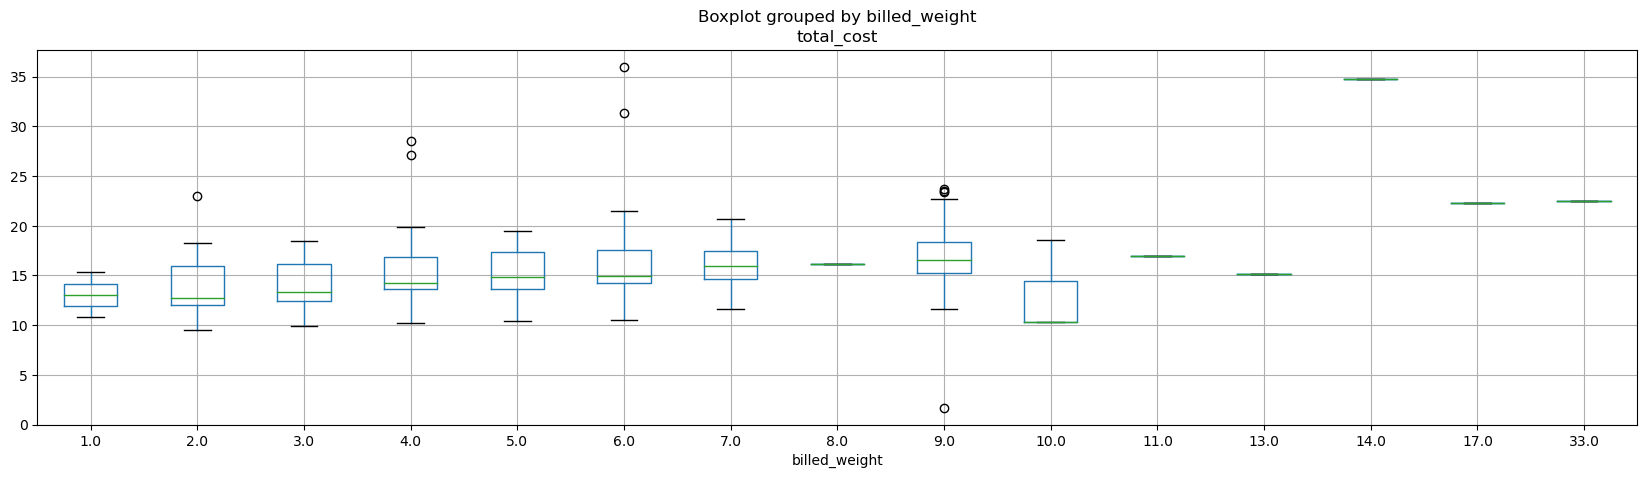

In [37]:
plt.rcParams['figure.figsize'] = [20, 5]
df.boxplot(column=['total_cost'], by ='billed_weight');

In [38]:
df_clean

,tracking_number,transaction_date,service_code,published_charge,incentive_charge,net_charge,ref_no_1,billed_weight,package_quantity,zone,receiver_city,receiver_state,receiver_postal,fuel_cost,detail_keyed_dim,total_cost,adjustment,distance_mi,week_of_year,month
20086,1ZR4R346YW91270010,2022-10-14,UPS SurePost - 1 LB or Greater,16.19,-3.24,12.95,3159579,9.0,1,3.0,GRAND JUNCTION,CO,815016348,1.81,15.0x 15.0x 10.0,12.95,0.0,NaN,41,10
20470,1ZR4R346YW97971878,2022-10-14,UPS SurePost - 1 LB or Greater,13.71,-2.74,10.97,3159596,6.0,1,2.0,HIGHLANDS RANCH,CO,801263606,1.54,15.0x 15.0x 6.0,10.97,-0.0,NaN,41,10
20126,1ZR4R346YW91974500,2022-10-13,UPS SurePost - 1 LB or Greater,17.73,-3.55,14.18,3159502,6.0,1,5.0,NORTHBROOK,IL,600627536,1.98,15.0x 15.0x 6.0,14.18,0.0,NaN,41,10
20464,1ZR4R346YW97821191,2022-10-13,UPS SurePost - 1 LB or Greater,16.91,-3.38,13.53,3159550,4.0,1,5.0,BRENTWOOD,CA,945135527,1.89,14.0x 14.0x 4.0,13.53,0.0,NaN,41,10
20207,1ZR4R346YW94002894,2022-10-13,UPS SurePost - 1 LB or Greater,13.25,-2.65,10.60,3159524,4.0,1,2.0,BRIGHTON,CO,806018761,1.48,14.0x 14.0x 4.0,10.60,0.0,NaN,41,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,1ZR4R346YW97186351,2021-11-03,UPS SurePost - 1 LB or Greater,18.39,-3.29,15.10,nan,7.0,1,5.0,OAKLAND,CA,94612,NaN,15.0x 15.0x 6.0,15.10,0.0,1519.36,44,11
20993,1ZR4R346YW91458176,2021-10-14,UPS SurePost - 1 LB or Greater,17.28,-2.93,14.35,732557,6.0,1,4.0,Webster City,IA,50595,1.25,15.0x 15.0x 6.0,14.35,0.0,976.51,41,10
6706,1ZR4R346YW95881513,2021-09-22,UPS SurePost - 1 LB or Greater,15.80,-3.16,12.64,732502,6.0,1,5.0,Murrieta,CA,92562,1.07,15.0x 15.0x 6.0,12.64,0.0,1296.27,38,09
16463,1ZR4R346YW90542264,2021-09-17,UPS SurePost - 1 LB or Greater,19.02,-3.16,15.86,3125741,6.0,1,5.0,Los Banos,CA,93635,1.34,15.0x 15.0x 6.0,15.86,0.0,1420.27,37,09
